In [1]:
#Import for floating number
from __future__ import division
#Dataframes imports
import pandas as pd
from pandas import Series,DataFrame
import numpy as np


In [2]:
#Visualisation Libs
import matplotlib as mlb
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [3]:
#For getting data from Yahoo Finance or Google Finance
from pandas_datareader.data import DataReader
from datetime import datetime

In [4]:
#Setting a list for tickers to be analyzed
tech_list = ['AAPL','GOOG','MSFT','AMZN']

#Setting date and time
end = datetime.now()
start = datetime(end.year - 1,end.month,end.day)


In [5]:
for stock in tech_list:
    globals()[stock] = DataReader(stock,'yahoo',start,end)

In [6]:
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,253.000000,253.000000,253.000000,253.000000,2.530000e+02,253.000000
mean,266.798814,260.710870,263.367747,264.051304,3.420493e+07,262.745167
std,45.249725,43.993730,44.455255,44.870701,1.725667e+07,45.408336
min,198.070007,192.580002,195.410004,193.339996,1.136200e+07,191.059784
25%,222.490005,217.649994,220.539993,220.699997,2.227790e+07,218.925781
50%,267.160004,261.230011,263.750000,264.470001,2.926430e+07,263.131531
75%,304.440002,298.869995,300.950012,303.190002,4.048500e+07,301.922699
max,372.380005,362.269989,364.000000,366.529999,1.067212e+08,366.529999


In [7]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2019-06-24 to 2020-06-23
Data columns (total 6 columns):
High         253 non-null float64
Low          253 non-null float64
Open         253 non-null float64
Close        253 non-null float64
Volume       253 non-null float64
Adj Close    253 non-null float64
dtypes: float64(6)
memory usage: 13.8 KB


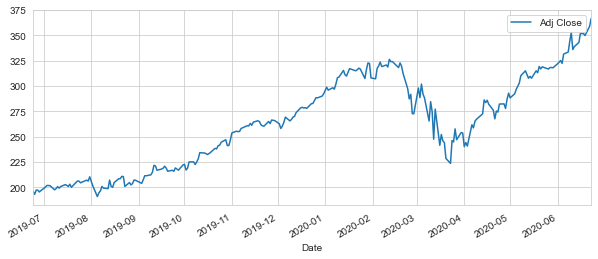

In [8]:
AAPL['Adj Close'].plot(legend = True,figsize=(10,4))

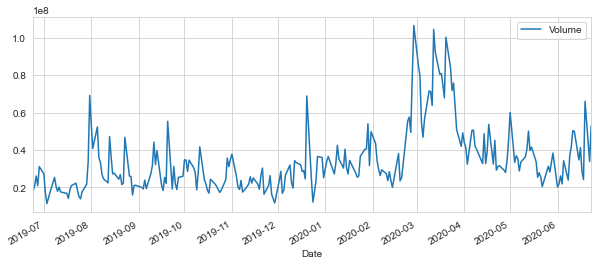

In [9]:
AAPL['Volume'].plot(legend = True,figsize=(10,4))

In [10]:
ma_day =[10,20,50]

for ma in ma_day:
    column_name="MA for %s days"%(str(ma))
    
    AAPL[column_name]= AAPL['Adj Close'].rolling(ma).mean()

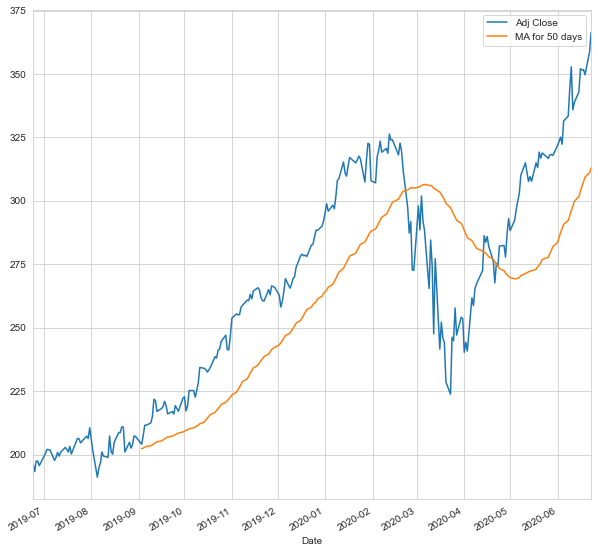

In [11]:
AAPL[['Adj Close','MA for 50 days']].plot(figsize=(10,10))

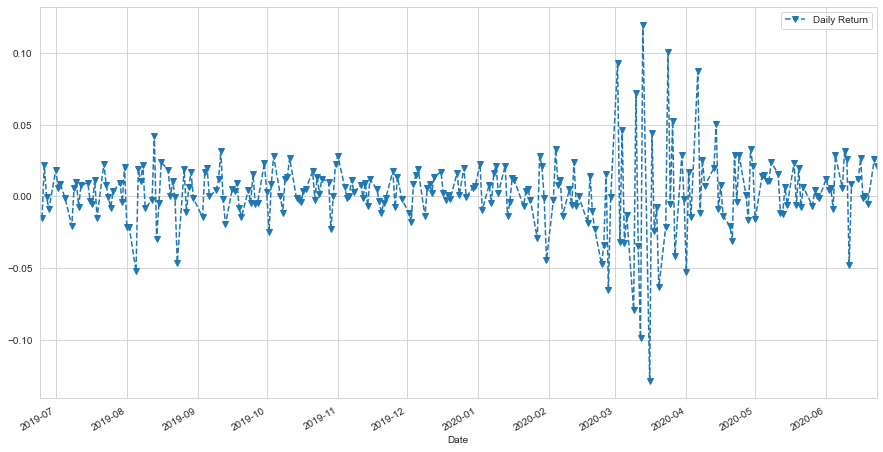

In [12]:
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()

AAPL['Daily Return'].plot(legend=True,figsize=(15,8),ls='--',marker = 'v')

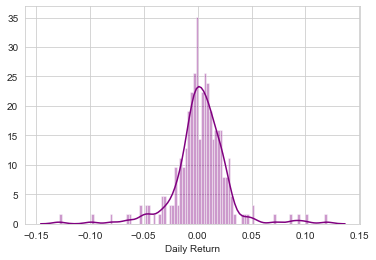

In [13]:
sns.distplot(AAPL['Daily Return'].dropna(),color='purple',bins=100)

In [14]:
closing_df = DataReader(tech_list,'yahoo',start,end)['Adj Close'].dropna()

In [15]:
closing_df.head()

Symbols,AAPL,AMZN,GOOG,MSFT
Date,,,,
2019-06-24,196.237991,1913.900024,1115.520020,136.105179
2019-06-25,193.263504,1878.270020,1086.349976,131.808044
2019-06-26,197.443619,1897.829956,1079.800049,132.301971
2019-06-27,197.384323,1904.280029,1076.010010,132.519287
2019-06-28,195.585770,1893.630005,1080.910034,132.331619


In [16]:
tech_rets = closing_df.pct_change()
tech_rets.head()

Symbols,AAPL,AMZN,GOOG,MSFT
Date,,,,
2019-06-24,NaN,NaN,NaN,NaN
2019-06-25,-0.015158,-0.018616,-0.026149,-0.031572
2019-06-26,0.021629,0.010414,-0.006029,0.003747
2019-06-27,-0.000300,0.003399,-0.003510,0.001643
2019-06-28,-0.009112,-0.005593,0.004554,-0.001416


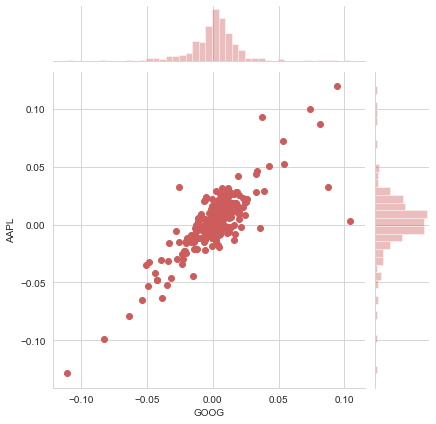

In [17]:
sns.jointplot('GOOG','AAPL',tech_rets,color='indianred',kind='scatter')

#Seaborn has pairplot for combinations
sns.pairplot(tech_rets.dropna(),size = 2.5,aspect = 1)

C:\Users\Diogo\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1264: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


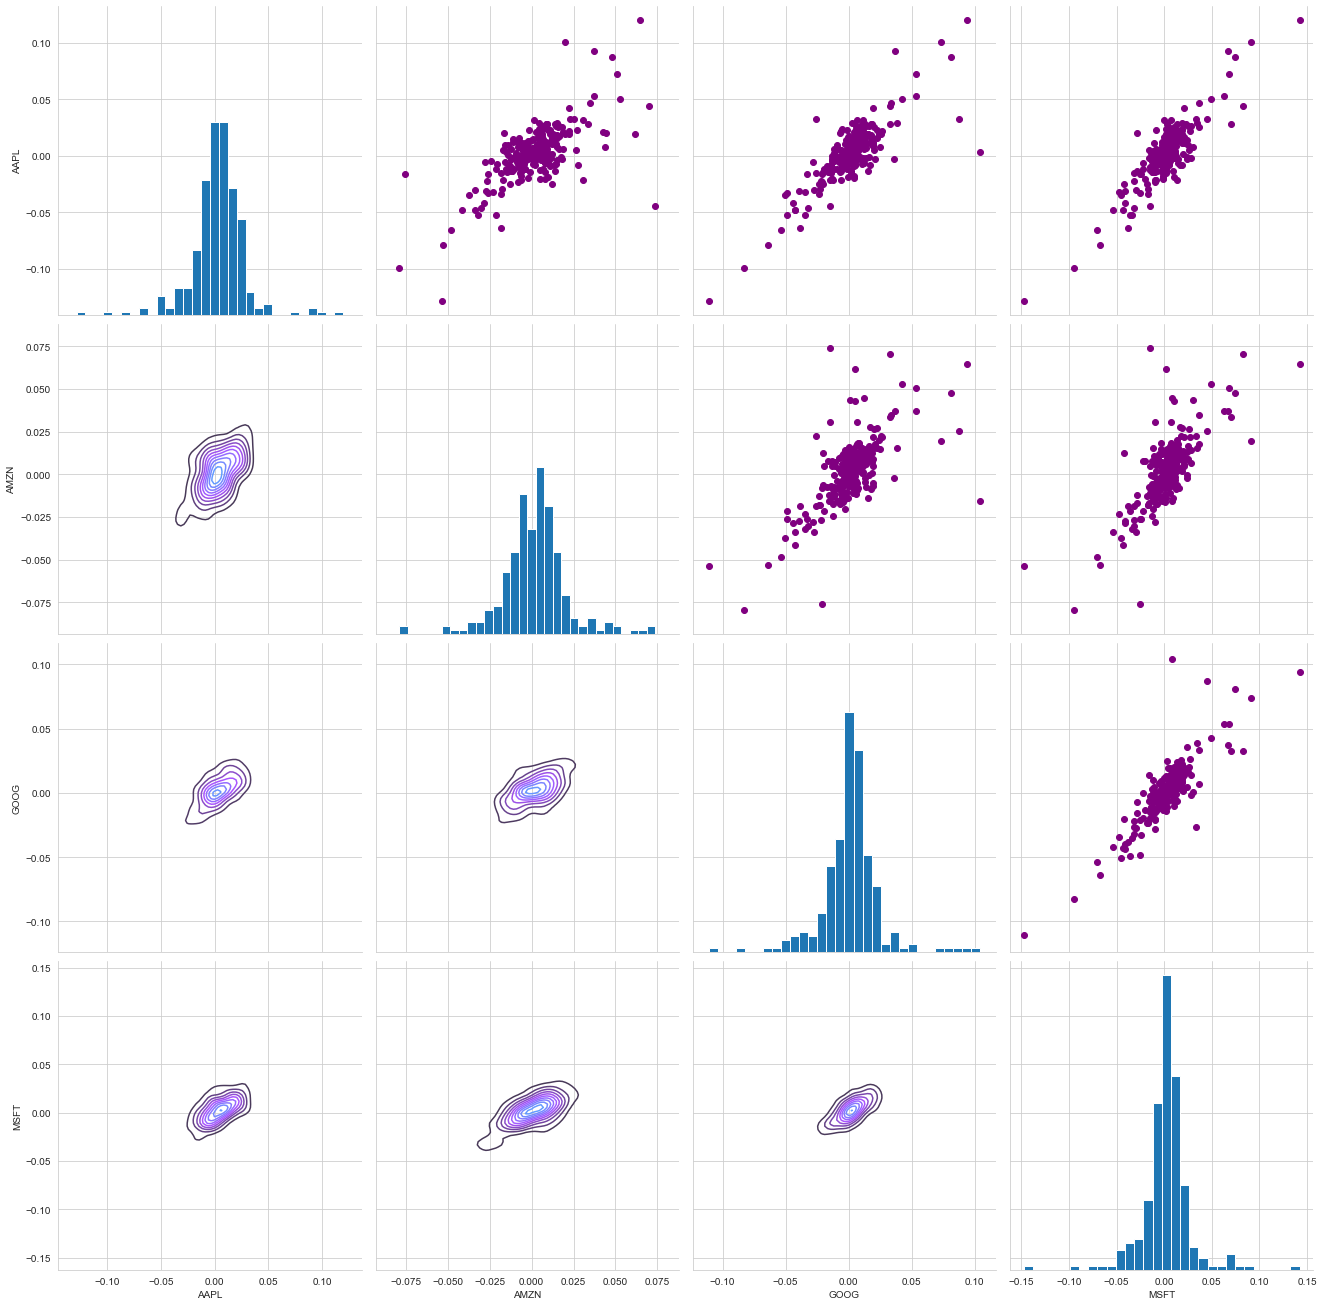

In [18]:
returns_fig = sns.PairGrid(tech_rets.dropna(),size=4.5,aspect=1)

returns_fig.map_upper(plt.scatter,color='purple')

returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

returns_fig.map_diag(plt.hist,bins=30)

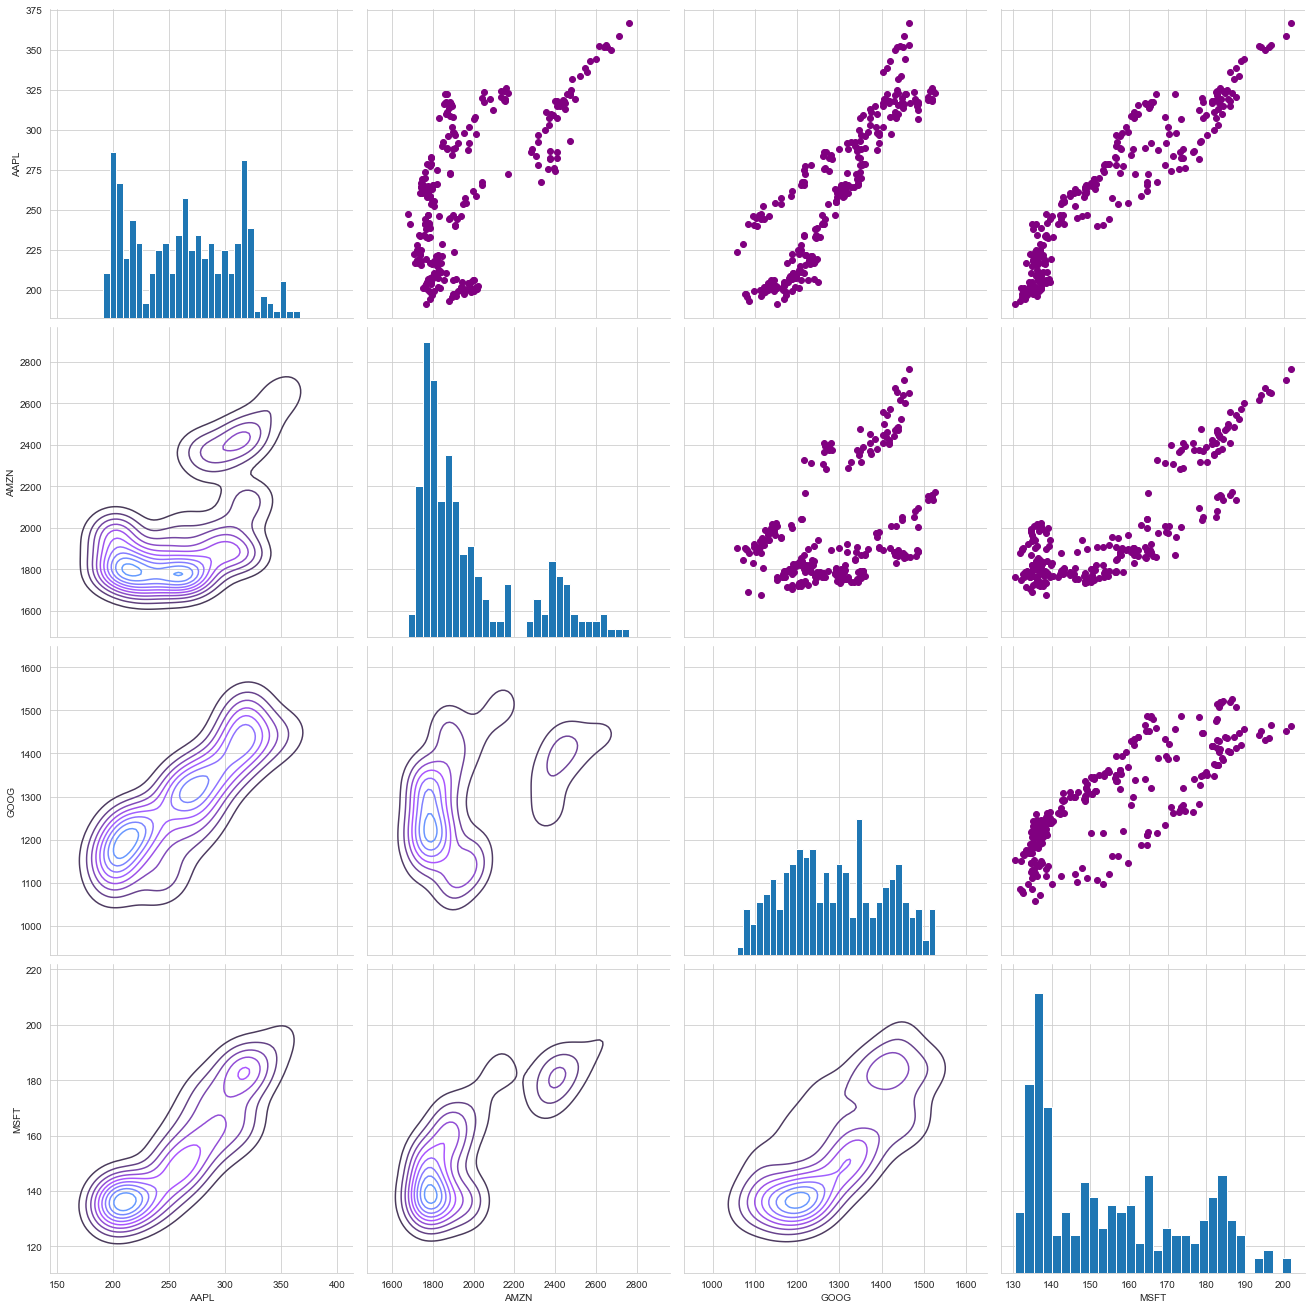

In [19]:
returns_fig = sns.PairGrid(closing_df.dropna(),size=4.5,aspect=1)

returns_fig.map_upper(plt.scatter,color='purple')

returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

returns_fig.map_diag(plt.hist,bins=30)

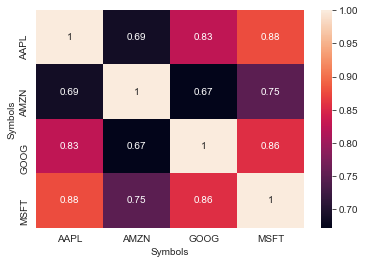

In [20]:
sns.heatmap(tech_rets.dropna().corr(),annot=True)

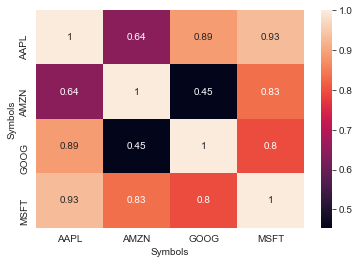

In [21]:
sns.heatmap(closing_df.dropna().corr(),annot=True)

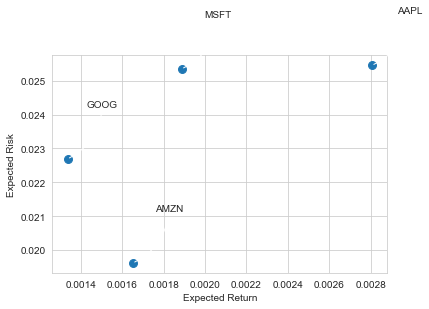

In [22]:
rets = tech_rets.dropna()

area = np.pi*20

plt.scatter(rets.mean(),rets.std(),s = area)

plt.xlabel('Expected Return')
plt.ylabel('Expected Risk')

#Putting annotation
# http://matplotlib.org/users/annotations_guide.html
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))


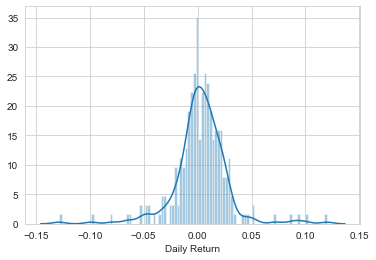

In [23]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100)

In [24]:
rets['AAPL'].quantile(0.05)

-0.03425838271082968

In [25]:
rets['GOOG'].quantile(0.05)

-0.03459902274899712

In [26]:
rets['AMZN'].quantile(0.05)

-0.02763362405276297

In [27]:
rets['MSFT'].quantile(0.05)

-0.03482080558639388

In [28]:
days = 365

dt = 1/days

mu = rets.mean()['GOOG']

sigma = rets.std()['GOOG']



In [33]:
def stock_monte_carlo(start_price,days,mu,sigma):
    
    price = np.zeros(days)
    
    price[0] = start_price
    
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for i in range(1,days):
        
        drift[i] = mu * dt
        shock[i] = np.random.normal(loc=mu*dt,scale= sigma*np.sqrt(dt))
        
        price[i] = price[i-1] + (price[i-1]*(drift[i]+shock[i]))
        
    return price
        

In [34]:
GOOG.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-06-24,1122.000000,1111.010010,1119.609985,1115.520020,1395600,1115.520020
2019-06-25,1114.349976,1083.800049,1112.660034,1086.349976,1546900,1086.349976
2019-06-26,1092.969971,1072.239990,1086.500000,1079.800049,1810900,1079.800049
2019-06-27,1087.099976,1075.290039,1084.000000,1076.010010,1004300,1076.010010
2019-06-28,1081.000000,1073.369995,1076.390015,1080.910034,1693200,1080.910034


Text(0.5, 1.0, 'Monte Carlo Analysis for Google')

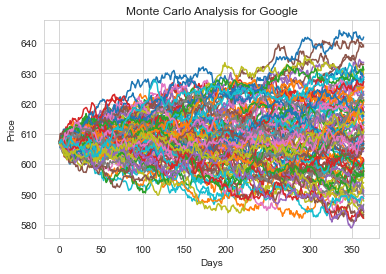

In [35]:
start_price = 607.20

for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
    
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis for Google')

In [37]:
runs = 10000

simulations = np.zeros(runs)

for run in range(runs):
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]

In [38]:
q = np.percentile(simulations,1)

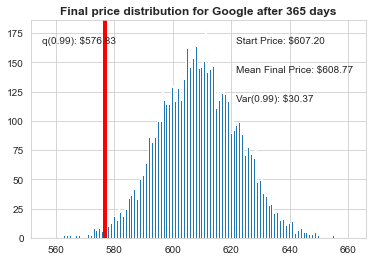

In [39]:
plt.hist(simulations,bins=200)

plt.figtext(0.6,0.8, s="Start Price: $%2.2f"%start_price)

plt.figtext(0.6,0.7, "Mean Final Price: $%2.2f"%simulations.mean())

plt.figtext(0.6,0.6, "Var(0.99): $%2.2f"%(start_price - q,))

plt.figtext(0.15,0.8,"q(0.99): $%2.2f"% q)

plt.axvline(x=q, linewidth=4,color='r')

plt.title("Final price distribution for Google after %s days"%days,weight = 'bold');